In [ ]:
# Датасет с Data Science зарплатами содержит 11 столбцов, где:
# work_year: Год, когда была выплачена зарплата.
# experience_level: Уровень опыта работы на данной должности в течение года
# employment_type: Тип занятости для данной роли
# job_title: Должность, на которой работал сотрудник в течение года.
# salary: Общая сумма зарплаты GROSS
# salary_currency: Валюта зарплаты в виде кода валюты ISO 4217.
# salaryinusd: зарплата в долларах США. Целевая переменная.
# employee_residence: Основная страна пребывания сотрудника в течение рабочего года в виде кода страны ISO 3166.
# remote_ratio: Общий объем работы, выполняемой удаленно
# company_location: Страна, в которой находится главный офис или филиал работодателя.
# company_size: Медианное количество человек, работавших в компании в течение года 


In [3]:
# 1.Изучите признаки, проведите правильный описательный анализ признаков. 
# 2.Удалите / заполните / замените пропуски или ошибки в данных.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import phik
import numpy as np

df = pd.read_csv('датасет_для_ДЗ.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [7]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [10]:
df.describe(include='object').T
# df.describe().T

,count,unique,top,freq
experience_level,3755,4,SE,2516
employment_type,3755,4,FT,3718
job_title,3755,93,Data Engineer,1040
salary_currency,3755,20,USD,3224
employee_residence,3755,78,US,3004
company_location,3755,72,US,3040
company_size,3755,3,M,3153


In [2]:
# Проверяем есть в нашем датасете незаполненные строки
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
# 3.Обязательно проверьте наличие дубликатов В СТРОКАХ и удалите, если они есть (команды в pandas: duplicated, drop_duplicates). 
# Дублем является тот объект, который является идентичный другому (то есть одна строка равна другой). 

In [4]:
# Удаляем дублирующиеся строки (только при условии, что во всех столбцах строка дублируется)
df_clean = df.drop_duplicates()
df_clean.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


In [ ]:
# 4.Выполните следующую аналитику:

# Какие самые высокооплачиваемые должности? Есть ли выбросы в заработной плате? В каких должностях?
# Влияет ли удаленная работа на зарплату? Есть ли корреляция?
# Зависит ли заработная плата от размера предприятия?
# Какие страны наиболее популярны среди вакансий? В каких заработная плата выше, а в каких ниже?
# Оцените медианную зарплату для каждой должности.
# Оцените, как сильно изменились зарплаты в 2023 году, относительно 2020. Какие должности стали более оплачиваемы, а какие нет?
# Выявите портрет самого успешного и богатого работника: кем он должен работать, где проживать, удаленная ли работа.
# Много ли людей работают и проживают в разных регионах? Где больше всего людей проживает и много ли из них (в процентном соотношении) работают удаленно на другую страну?
# Выявите новые инсайты, если захотите! (какие страны предпочитают работу оффлан?)

In [5]:
# сортируем по зп в usd и выводим топ 10 высокооплачиваемых позиций

high_paying_position = df_clean.sort_values(by = ['salary_in_usd'], ascending = False).reset_index()
top_10_positions = high_paying_position[['work_year', 'experience_level', 'job_title', 'salary_in_usd', 'remote_ratio', 'company_location']]
print(f'Топ-10 самых высокооплачиваемых позиций\n')
print(top_10_positions[:10])

Топ-10 самых высокооплачиваемых позиций

   work_year experience_level                           job_title  \
0       2020               MI                  Research Scientist   
1       2022               MI                        Data Analyst   
2       2023               SE                        AI Scientist   
3       2021               MI  Applied Machine Learning Scientist   
4       2021               EX            Principal Data Scientist   
5       2020               SE                      Data Scientist   
6       2022               SE                 Data Analytics Lead   
7       2023               SE                        Data Analyst   
8       2022               SE              Applied Data Scientist   
9       2023               SE                      Data Architect   

   salary_in_usd  remote_ratio company_location  
0         450000             0               US  
1         430967             0               GB  
2         423834             0               IL  

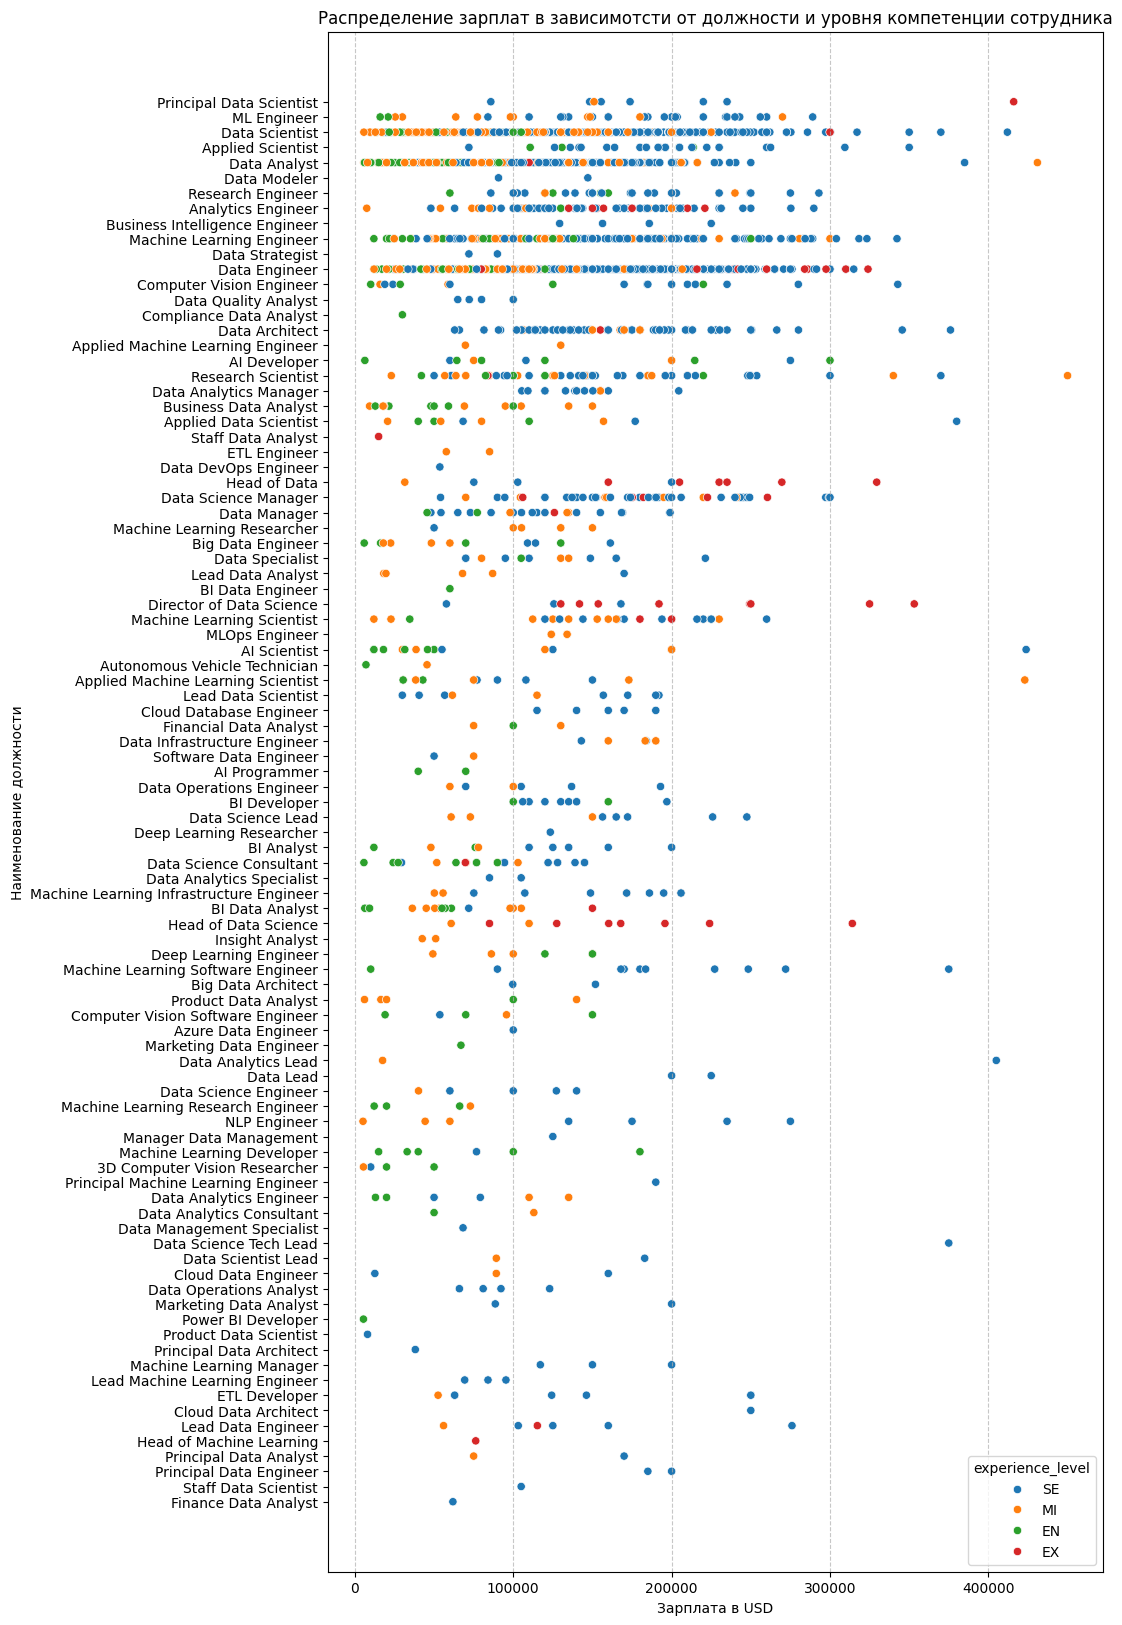

In [6]:
# смотрим по графику рассеяния выбросы зп в зависимости от должности и уровня опыта работы (по цвету метки)
plt.figure(figsize=(10,20))

sns.scatterplot(x=df_clean.salary_in_usd, y=df_clean.job_title, hue=df_clean.experience_level)
plt.title('Распределение зарплат в зависимотсти от должности и уровня компетенции сотрудника')
plt.xlabel('Зарплата в USD')
plt.ylabel('Наименование должности')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

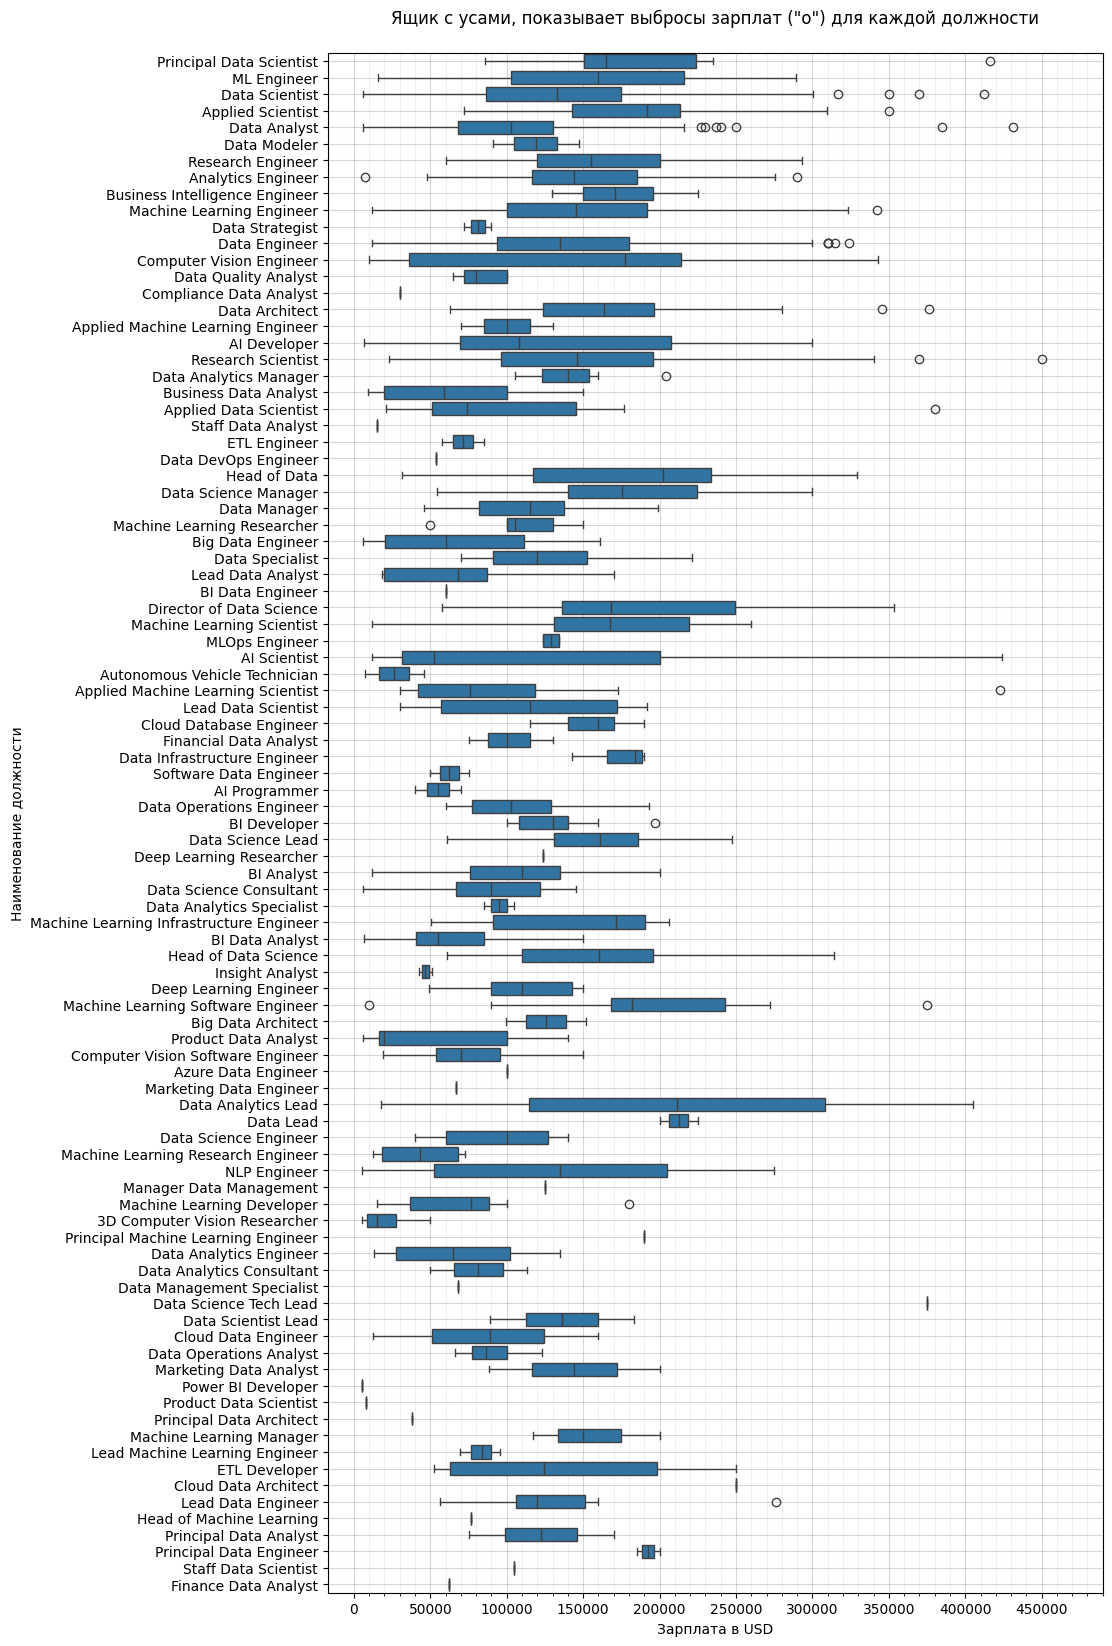

In [9]:
# Выведем выбросы зарплат для каждой должности, обозначены 'о'

plt.figure(figsize=(10,20))
ax = sns.boxplot(data=df_clean, x="salary_in_usd", y="job_title", orient='h') 
plt.title('Ящик с усами, показывает выбросы зарплат ("о") для каждой должности\n')
plt.xlabel('Зарплата в USD')
plt.ylabel('Наименование должности')

major_ticks = np.arange(0, 500000, 50000)
minor_ticks = np.arange(0, 500000, 10000)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
plt.show()

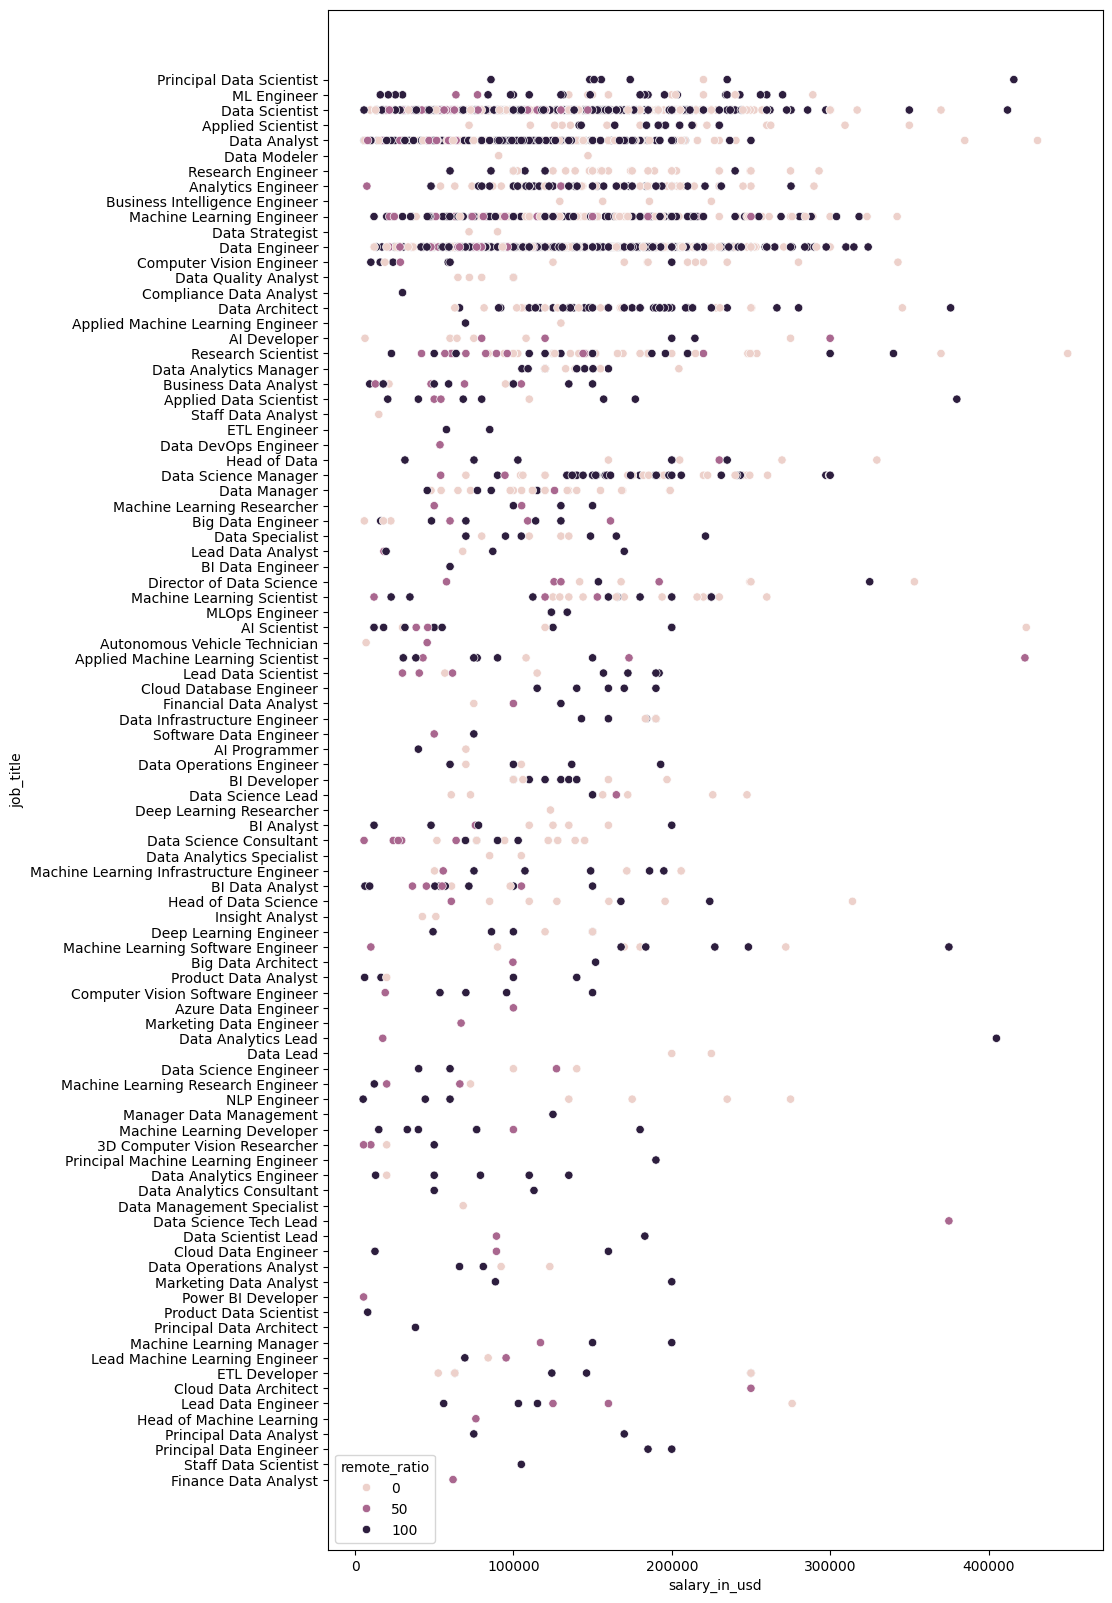

In [8]:
# смотрим по графику рассеяния выбросы зп в зависимости от должности и режиму работы(удаленная или нет) (по цвету метки)
plt.figure(figsize=(10,20))

sns.scatterplot(x=df_clean.salary_in_usd, y=df_clean.job_title, hue=df_clean.remote_ratio)
plt.show()

<Axes: >

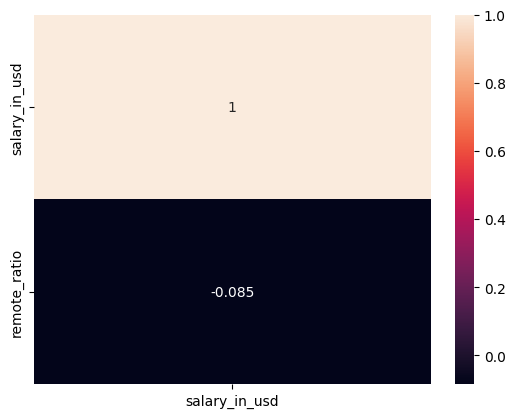

In [10]:
# смотрим корреляцию между зп и типом работы (удаленная или нет) на разных матрицах

sns.heatmap(df_clean[['salary_in_usd', 'remote_ratio']].corr()[['salary_in_usd']], annot=True) 

<Axes: >

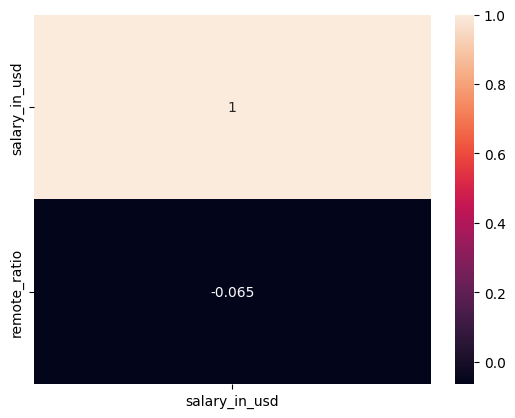

In [35]:
sns.heatmap(df_clean[['salary_in_usd', 'remote_ratio']].corr('kendall')[['salary_in_usd']], annot=True)

<Axes: >

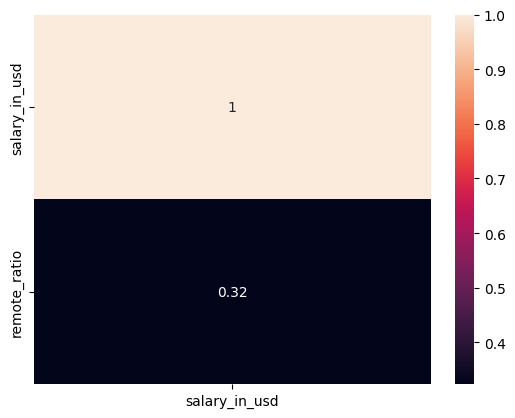

In [41]:
sns.heatmap(df_clean[['salary_in_usd', 'remote_ratio']].phik_matrix(interval_cols=['remote_ratio', 'salary_in_usd'])[['salary_in_usd']], annot=True)

# после корреляционного анализа видим, что режим работы (удаленный или офисный) не особо влияет на зп сотрудника. Также это видно по графику рассеяния выше.

C:\Users\Unaagy\AppData\Local\Temp\ipykernel_7948\1744686372.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['company_size'] = pd.Categorical(df_clean['company_size'], categories=x_order, ordered=True)


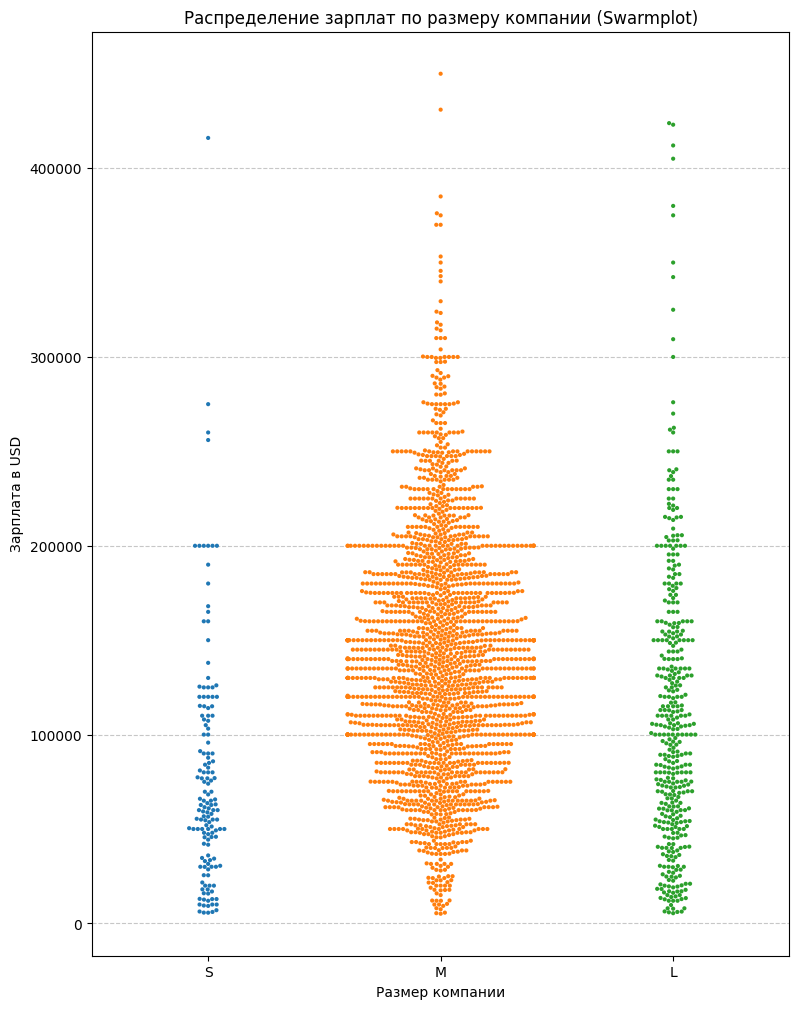

In [11]:
# Смотрим зависит ли заработная плата от размера предприятия?

# Упорядочим категории company_size для правильного отображения на графике

x_order = ['S', 'M', 'L']
# меняем тип данных столбца 'company_size' с object на специальный категориальный для Pandas
df_clean_cat = df_clean[['company_size', 'salary_in_usd']].copy()
df_clean['company_size'] = pd.Categorical(df_clean['company_size'], categories=x_order, ordered=True)


# используем графики распределения точек swarmplot или stripplot
plt.figure(figsize=(9,12))

sns.swarmplot(x='company_size', y='salary_in_usd', data=df_clean, hue='company_size', size=3)
# sns.stripplot(x='company_size', y='salary_in_usd', data=df_clean, hue='company_size', size=3)
plt.title('Распределение зарплат по размеру компании (Swarmplot)')
plt.xlabel('Размер компании')
plt.ylabel('Зарплата в USD')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [34]:
# из графика можно сделать вывод, что размер компании не сильно влияет на уровень зарплат. 
# Однако, в маленьких компаниях вероятность получать очень высокую зп ниже, чем в средних и крупных компаниях    
# Также видим, что в таблице представлено больше компаний размера М. В этих же компаниях ниболее вероятно получать более высокую зп.

############ Если возьмем медиану для каждого размера компаний по уровню зп, то получим следующие данные

# Почистим явные выбросы в компаниях S и M
df_clean_emissions = df_clean[(df_clean.company_size != 'L') & (df_clean['salary_in_usd'] < 400000)]
# Объединим все почищенные данные в одну таблицу
df_clean_result = pd.concat([df_clean_emissions,  df_clean[df_clean.company_size == 'L']], axis=0, join='outer', ignore_index=True)
# Посчитаем медианную зп для каждого размера компаний
mediana_salary_from_size =df_clean_result.groupby('company_size')['salary_in_usd'].median().reset_index()
print(f'Медианная зарплата в зависимости от размера компании')
print(mediana_salary_from_size.head())

Медианная зарплата в зависимости от размера компании
  company_size  salary_in_usd
0            L       100000.0
1            M       136994.0
2            S        62146.0


In [40]:
# Какие страны наиболее популярны среди вакансий? 

# группируем по уникальным значенимя работы и страны, считаем кол-во уникальных значений и присваиваем новую индексацию (так pandas называет новую колонку count)
df_jobs_country = df_clean.groupby('job_title', group_keys=True)[['job_title', 'company_location']].value_counts().reset_index()
# переименовываем новую колонку count на более понятное опрделение job_country_count
df_jobs_country.rename(columns={'count': 'job_country_count'}, inplace=True)
# сортируем по кол-ву уникальных значений в порядке убывания
df_jobs_country = df_jobs_country.sort_values(by='job_country_count', ascending=False)
# df_jobs_country.head(50)

# выводим только значения определенной должности по условию Data Scientist
# df_jobs_country.loc[df_jobs_country['job_title'] == 'Data Scientist'] 

# выводим максимальное количество вакансий по странам
df_top_country = df_clean.groupby('company_location', group_keys=True)[['company_location']].value_counts().reset_index().sort_values(by='count', ascending=False)
df_top_country.head(10)

,company_location,count
70,US,1929
28,GB,155
12,CA,83
38,IN,57
20,DE,55
25,ES,44
27,FR,33
10,BR,15
60,PT,14
6,AU,14


Список стран, которые участвуют в анализе:
['US', 'PT', 'NL', 'MX', 'IN', 'GR', 'GB', 'FR', 'ES', 'DE', 'CA', 'BR', 'AU']
----------------------------------------------------------------------------------------------------
Таблица медианных зарплат для каждой выбранной страны
   company_location  salary_in_usd
0                AU        72525.0
1                BR        42000.0
2                CA       120000.0
3                DE        71897.0
4                ES        48289.0
5                FR        59102.0
6                GB        80036.0
7                GR        47280.0
8                IN        18314.0
9                MX        66000.0
10               NL        73546.0
11               PT        52932.5
12               US       145885.0
----------------------------------------------------------------------------------------------------


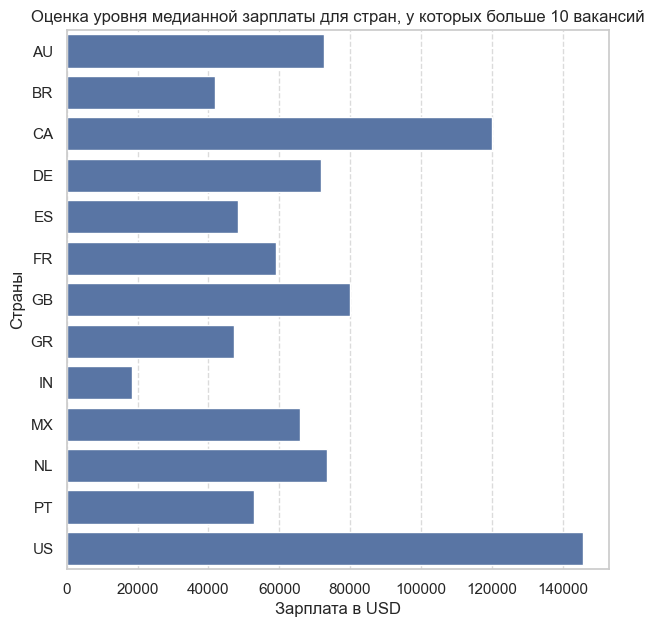

In [74]:
# В каких странах заработная плата выше, а в каких ниже?

# подготовим наш датасет
# Когда отстроили первый график, то обнаружилось, что есть страны, в которых всего одна вакансия, с высокой или наоборот низкой зп.
# Такие данные будут некорректны в сравнении с медианой зп в других странах, поэтому отфильтруем таблицу и оставим в ней страны, в которых больше 10 вакансий
df_vacancy_country = df_top_country[df_top_country['count'] >= 10].sort_values(by='company_location', ascending=False)        
df_vacancy_country.head(15)

# Отсортируем зп по странам
df_slr_country = df_clean[['company_location', 'salary_in_usd']].sort_values(by='company_location', ascending=True)        
# print(df_slr_country.head(20))

# Заполним список странами, у которых больше 10 вакансий 
list_of_top_countries = df_vacancy_country['company_location'].tolist()
print(f'Список стран, которые участвуют в анализе:')
print(list_of_top_countries)
print('-' * 100)

# Отфильтруем наши данные в df_slr_country только для списка стран list_of_top_countries
filtered_df_slr_country = df_slr_country[df_slr_country['company_location'].isin(list_of_top_countries)]

# Считаем медианы зп по странам
median_country_salary = filtered_df_slr_country.groupby('company_location')['salary_in_usd'].median().reset_index()
print(f'Таблица медианных зарплат для каждой выбранной страны')
print(median_country_salary.head(15))
print('-' * 100)

# строим график 
plt.figure(figsize=(7,7))

ax = sns.barplot(median_country_salary, x="salary_in_usd", y="company_location", estimator="sum", errorbar=None)
plt.title('Оценка уровня медианной зарплаты для стран, у которых больше 10 вакансий')
plt.xlabel('Зарплата в USD')
plt.ylabel('Страны')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()



Список зарплат и тип работы для стран с кол-вом вакансий больше 10
   company_location  salary_in_usd  remote_ratio
0                ES          85847           100
1                US          30000           100
2                US          25500           100
3                CA         175000           100
4                CA         120000           100
5                US         222200             0
6                US         136000             0
7                CA         219000             0
8                CA         141000             0
9                US         147100             0
10               US          90700             0
11               US         130000           100
12               US         100000           100
13               US         213660             0
14               US         130760             0
15               US         147100             0
16               US          90700             0
17               US         170000             0
18

<Axes: >

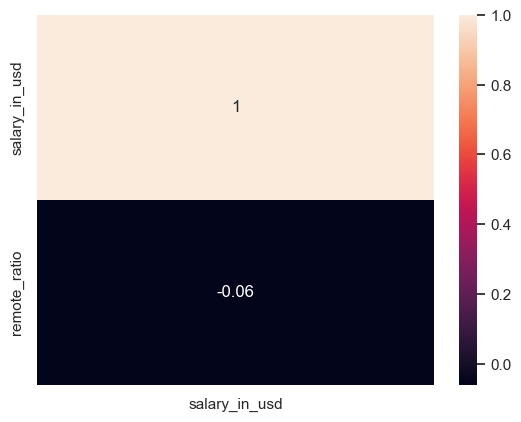

In [76]:
# Посмотрим влияние зп на тип занятости (remote_ratio) для стран, где больше 10 вакансий, через phik матрицу

# Будем использовать фильтр из df_vacancy_country, и отсортируем датасет, оставив remote_ratio
df_slr_remote = df_clean[['company_location', 'salary_in_usd', 'remote_ratio']].reset_index(drop=True, inplace=False)

# Заполним список странами, у которых больше 10 вакансий 
list_of_top_countries_remote = df_vacancy_country['company_location'].tolist()

# Отфильтруем наши данные в df_slr_remote только для списка стран list_of_top_countries
filtered_df_slr_remote = df_slr_remote[df_slr_remote['company_location'].isin(list_of_top_countries_remote)]
print(f'Список зарплат и тип работы для стран с кол-вом вакансий больше 10')
print(filtered_df_slr_remote.head(20))
print('-' * 80)
print(f'Смотрим Phik матрицу для оценки влияния типа работы (remote_ratio) на зарплату')

sns.heatmap(filtered_df_slr_remote[['salary_in_usd', 'remote_ratio']].corr('kendall')[['salary_in_usd']], annot=True)

In [ ]:
# Таким образом видим, что уровень зарплат по-прежнему не заивсит от типа работы, даже, если отсеить страны с низким кол-вом вакансий

In [79]:
# Оцените медианную зарплату для каждой должности.

median_job_title_salary = df_clean.groupby('job_title')['salary_in_usd'].median().reset_index()
print(f'Таблица медианных зарплат для разных должностей\n')
print(median_job_title_salary.sort_values(by='salary_in_usd', ascending=False).head(10))

Таблица медианных зарплат для разных должностей

                              job_title  salary_in_usd
46               Data Science Tech Lead       375000.0
19                 Cloud Data Architect       250000.0
35                            Data Lead       212500.0
28                  Data Analytics Lead       211254.5
58                         Head of Data       202500.0
83              Principal Data Engineer       192500.0
8                     Applied Scientist       192000.0
85  Principal Machine Learning Engineer       190000.0
34         Data Infrastructure Engineer       183655.0
75   Machine Learning Software Engineer       181800.0


Таблица сравнения зарплат в 2020 году и в 2023 году
----------------------------------------------------------------------------------------------------


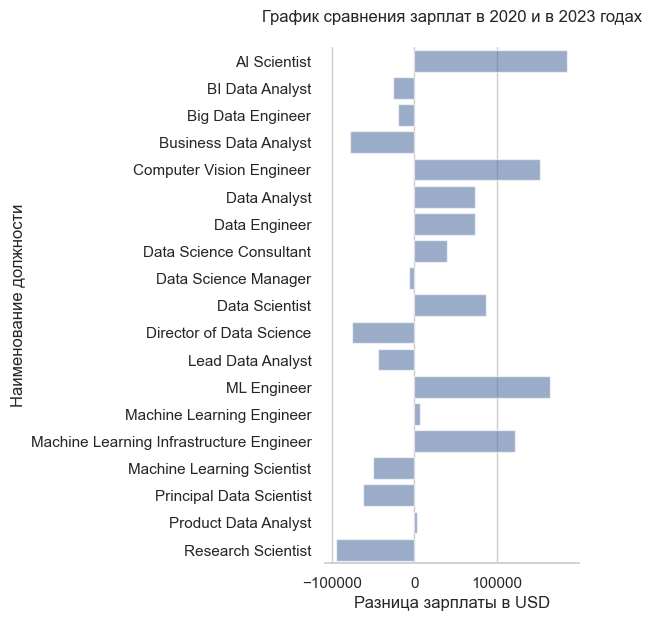

In [12]:
# Оцените, как сильно изменились зарплаты в 2023 году, относительно 2020. Какие должности стали более оплачиваемы, а какие нет?

job_title_2020 = df_clean[df_clean.work_year == 2020].reset_index(drop=True)
median_job_title_2020 = job_title_2020.groupby('job_title')['salary_in_usd'].median().reset_index()
median_job_title_2020.rename(columns={'salary_in_usd': 'salary_in_usd_2020'}, inplace=True)
# median_job_title_2020.head(10)

job_title_2023 = df_clean[df_clean.work_year == 2023].reset_index(drop=True)
median_job_title_2023 = job_title_2023.groupby('job_title')['salary_in_usd'].median().reset_index()
median_job_title_2023.rename(columns={'salary_in_usd': 'salary_in_usd_2023'}, inplace=True)
# print(median_job_title_2023.head(10))

# Находим пересечение должностей в 2020 и в 2023 годах
compare_job_title = median_job_title_2020.set_index('job_title').join(median_job_title_2023.set_index('job_title'), how='inner')
compare_job_title['delta_salary'] = compare_job_title['salary_in_usd_2023'] - compare_job_title['salary_in_usd_2020']
print(f'Таблица сравнения зарплат в 2020 году и в 2023 году')
print(compare_job_title.sort_values(by='delta_salary', ascending=False).head(20))
print('-' * 100)

# соогласно финальной таблице видно какие должности стали более оплачиваемы, а какие менее

# Визуализируем результат
sns.set_theme(style="whitegrid")


g = sns.catplot(
    data=compare_job_title, kind="bar",
    x="delta_salary", y="job_title", 
    errorbar="sd",  alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Salary change")
plt.title('График сравнения зарплат в 2020 и в 2023 годах\n')
plt.xlabel('Разница зарплаты в USD')
plt.ylabel('Наименование должности')

plt.show()

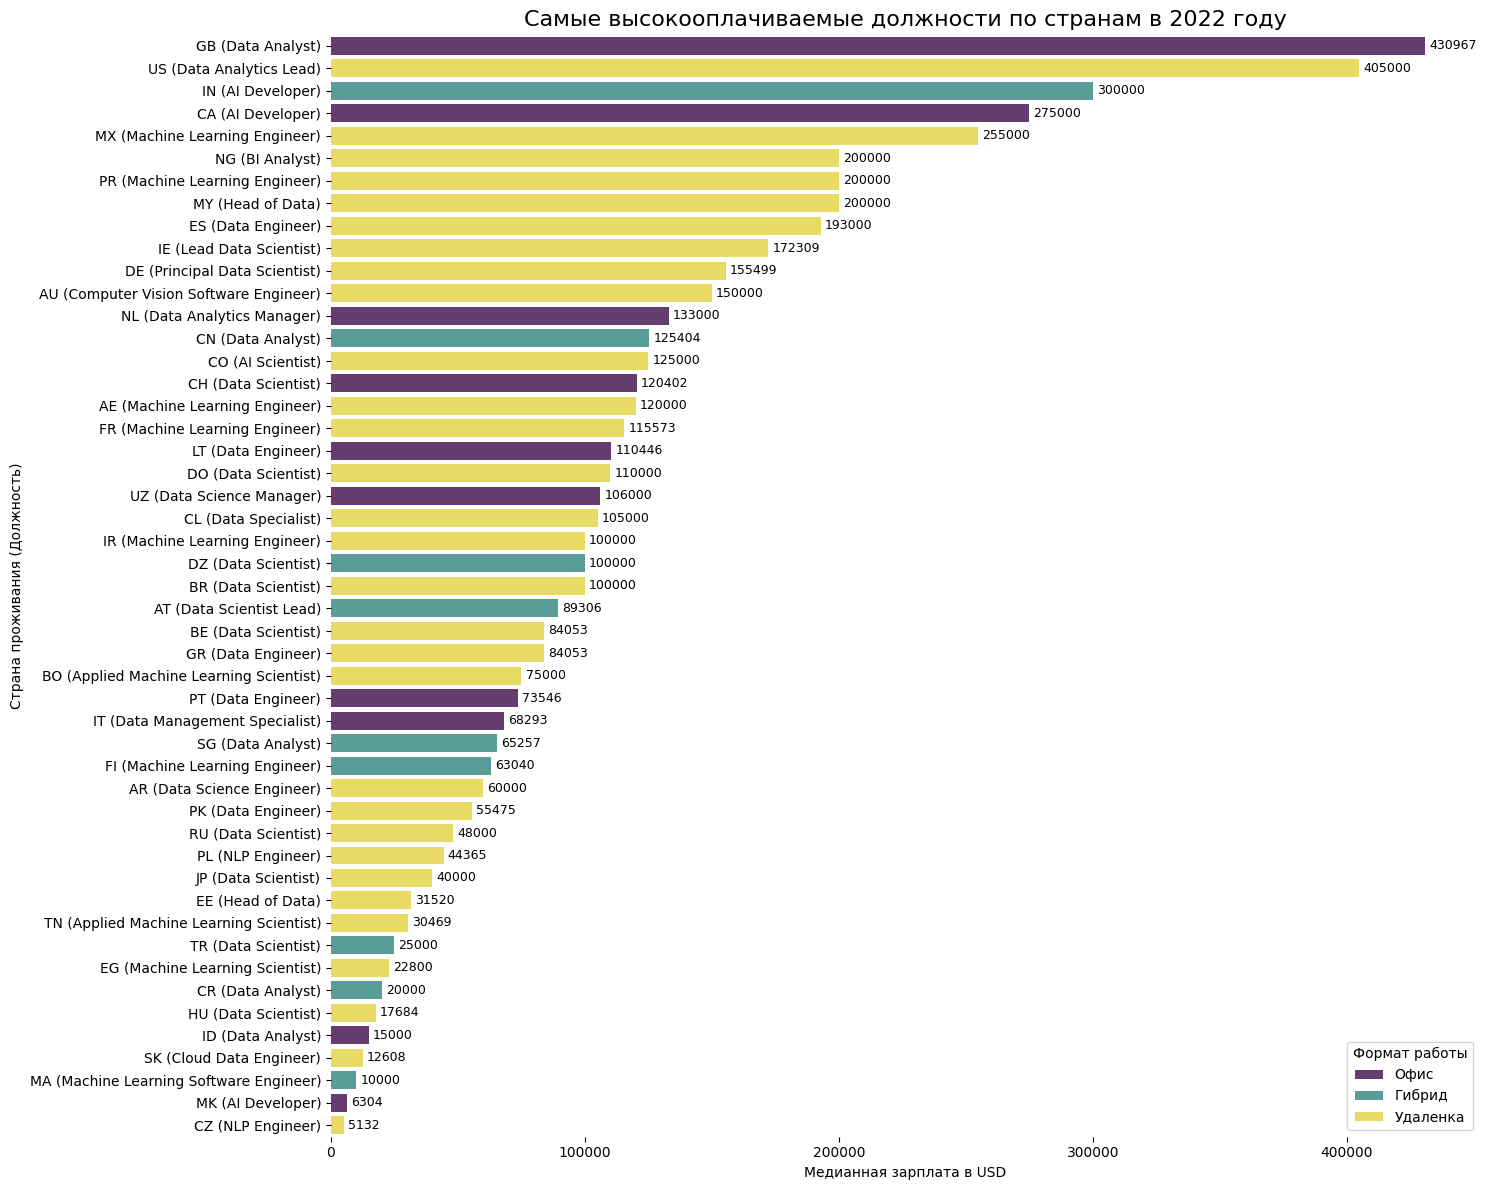

In [4]:
# Выявите портрет самого успешного и богатого работника: кем он должен работать, где проживать, удаленная ли работа.

# находим все данные за 2022 год
job_title_2022 = df_clean[df_clean.work_year == 2022].reset_index()
# с помощью группировки находим топовую по зп должность для каждой страны проживания
top_job_titles_per_country = job_title_2022.groupby('employee_residence')['salary_in_usd'].idxmax()
# выстраиваем таблицу из выбранных строк высокооплачиваемых должностей
top_salaries_df = job_title_2022.loc[top_job_titles_per_country].reset_index(drop=True)
# для удобства сортируем таблицу
most_top_job_title_2022 = top_salaries_df.sort_values(by='salary_in_usd', ascending=False)
# print(most_top_job_title_2022[['job_title', 'salary_in_usd', 'employee_residence', 'remote_ratio']].head(20))

# Визуализируем результат
plt.figure(figsize=(15, 12))

# Объединяем employee_residence и job_title для оси Y
most_top_job_title_2022['display_label'] = most_top_job_title_2022['employee_residence'] + ' (' + most_top_job_title_2022['job_title'] + ')'

ax = sns.barplot(
    data=most_top_job_title_2022,
    x="salary_in_usd",
    y="display_label", # На оси Y будет отобраться и страна проживания, и должность
    hue="remote_ratio",
    errorbar=None, # Т.к. у нас медиана, обычно не нужен errorbar
    palette="viridis",
    alpha=.8
)

ax.set_xlabel("Медианная зарплата в USD")
ax.set_ylabel("Страна проживания (Должность)")
ax.set_title("Самые высокооплачиваемые должности по странам в 2022 году", fontsize=16)

# Настройка легенды по remote_ratio
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Офис', 'Гибрид', 'Удаленка'], title="Формат работы")

# Добавление значений зарплат на бары 
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3, color='black', fontsize=9) # Для первого набора баров (hue=0)
if len(ax.containers) > 1: # Если есть второй набор баров (hue=50)
    ax.bar_label(ax.containers[1], fmt='%.0f', padding=3, color='black', fontsize=9)
if len(ax.containers) > 2: # Если есть третий набор баров (hue=100)
    ax.bar_label(ax.containers[2], fmt='%.0f', padding=3, color='black', fontsize=9)


sns.despine(left=True, bottom=True)
plt.tight_layout() # Автоматически корректирует расположение элементов
plt.show()


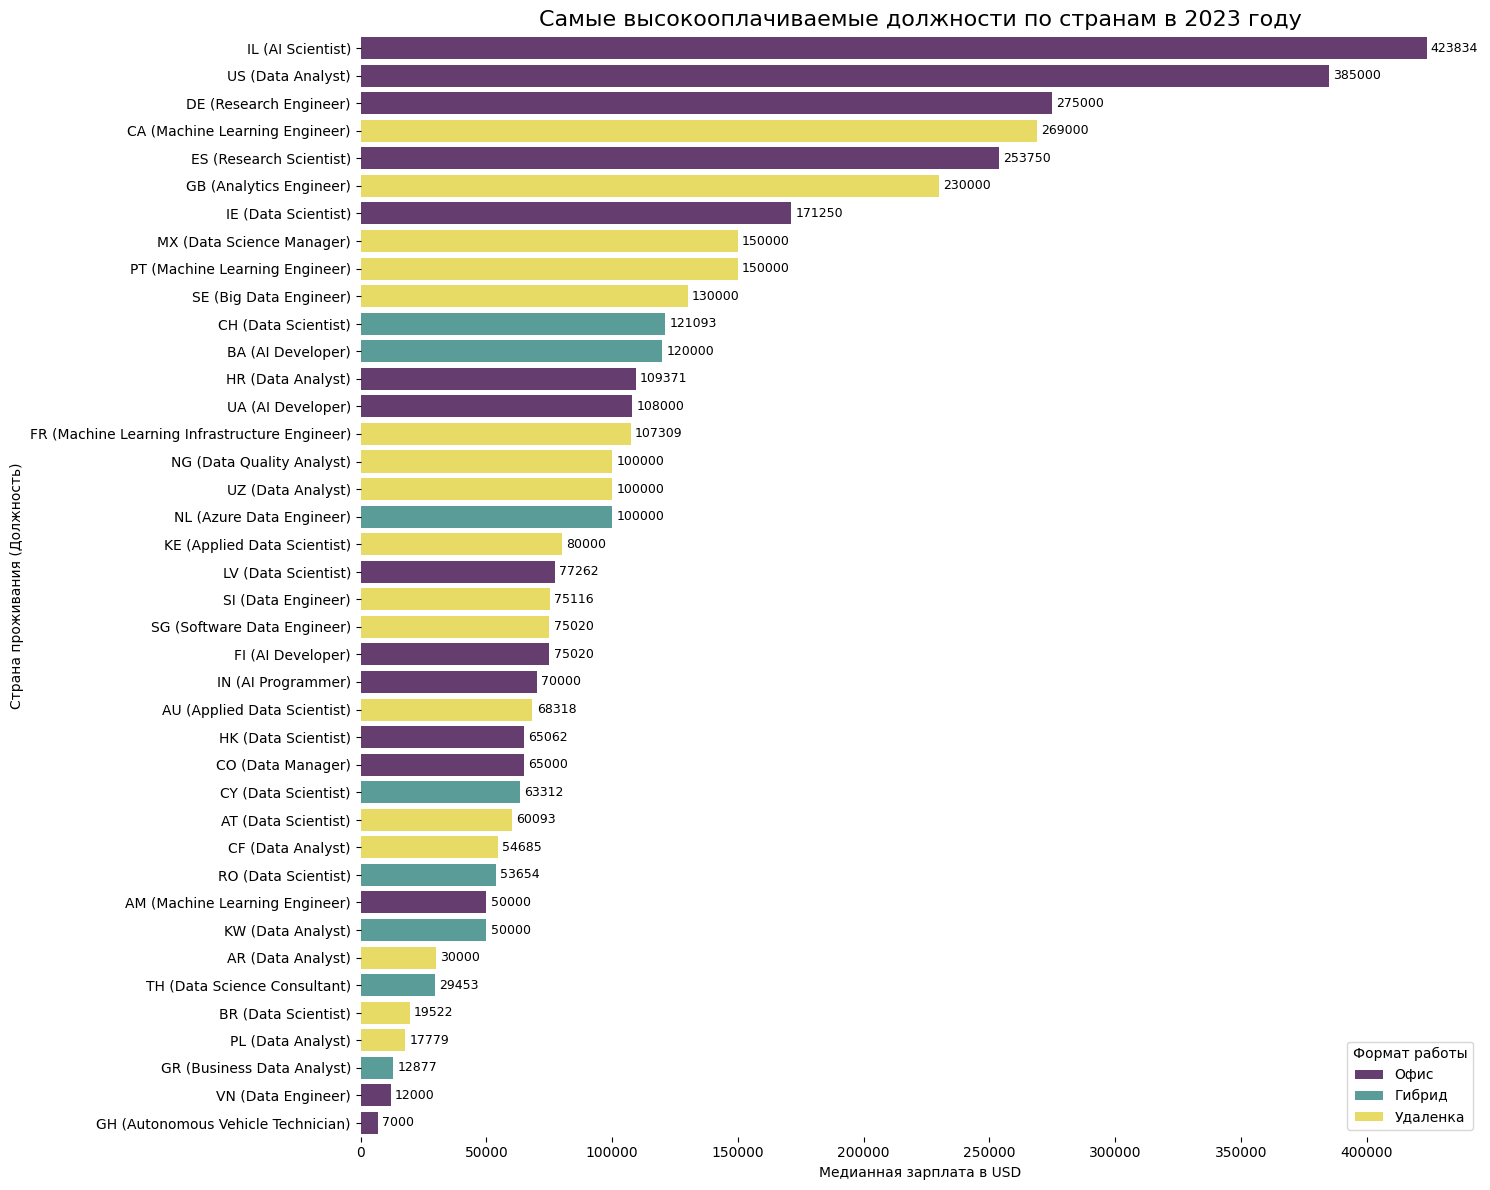

In [3]:
# находим все данные за 2023 год
job_title_2023 = df_clean[df_clean.work_year == 2023].reset_index()
# с помощью группировки находим топовую по зп должность для каждой страны проживания
top_job_titles_per_country = job_title_2023.groupby('employee_residence')['salary_in_usd'].idxmax()
# выстраиваем таблицу из выбранных строк высокооплачиваемых должностей
top_salaries_df = job_title_2023.loc[top_job_titles_per_country].reset_index(drop=True)
# для удобства сортируем таблицу
most_top_job_title_2023 = top_salaries_df.sort_values(by='salary_in_usd', ascending=False)
# print(most_top_job_title_2023[['job_title', 'salary_in_usd', 'employee_residence', 'remote_ratio']].head(20))

# Визуализируем результат
plt.figure(figsize=(15, 12))

# Объединяем employee_residence и job_title для оси Y
most_top_job_title_2023['display_label'] = most_top_job_title_2023['employee_residence'] + ' (' + most_top_job_title_2023['job_title'] + ')'

ax = sns.barplot(
    data=most_top_job_title_2023,
    x="salary_in_usd",
    y="display_label", # На оси Y будет отобраться и страна проживания, и должность
    hue="remote_ratio",
    errorbar=None, # Т.к. у нас медиана, обычно не нужен errorbar
    palette="viridis",
    alpha=.8
)

ax.set_xlabel("Медианная зарплата в USD")
ax.set_ylabel("Страна проживания (Должность)")
ax.set_title("Самые высокооплачиваемые должности по странам в 2023 году", fontsize=16)

# Настройка легенды по remote_ratio
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Офис', 'Гибрид', 'Удаленка'], title="Формат работы")

# Добавление значений зарплат на бары 
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3, color='black', fontsize=9) # Для первого набора баров (hue=0)
if len(ax.containers) > 1: # Если есть второй набор баров (hue=50)
    ax.bar_label(ax.containers[1], fmt='%.0f', padding=3, color='black', fontsize=9)
if len(ax.containers) > 2: # Если есть третий набор баров (hue=100)
    ax.bar_label(ax.containers[2], fmt='%.0f', padding=3, color='black', fontsize=9)


sns.despine(left=True, bottom=True)
plt.tight_layout() # Автоматически корректирует расположение элементов
plt.show()

In [ ]:
# На графиках отображены портреты успешных работников для 2022 года и для 2023 года. 
# Можно сделать срез из 5 топовых должностей для каждого года и отобразить это на одном графике. (Не стала делать, не знаю нужно мне это или нет)

In [18]:
# Много ли людей работают и проживают в разных регионах? Где больше всего людей проживает и много ли из них (в процентном соотношении) 
# работают удаленно на другую страну?

# Если мы хотим узнать сколько людей работает в разных странах, то...
count_company_location = df_clean. groupby('company_location')['work_year'].value_counts().reset_index()
print(f'Количество людей, работающих в стране, в зависимости от года\n')
print(f'В выводе данные отсортированы только за 2023 год')
print(count_company_location[count_company_location.work_year == 2023].sort_values(by='count', ascending=False).head(20))
print('-' * 60)

# Если мы хотим узнать сколько людей проживает в разных странах, то...
count_employee_residence = df_clean. groupby(['employee_residence', 'remote_ratio'])['work_year'].value_counts().reset_index()

# Считаем сотрудников в 2023 году, которые, так или иначе, но ходят в офис
office_employee_prep = count_employee_residence[(count_employee_residence.work_year == 2023) & ((count_employee_residence.remote_ratio == 0) + (count_employee_residence.remote_ratio == 50))].sort_values(by='employee_residence', ascending=False)
office_employee = office_employee_prep.groupby(['employee_residence'])['count'].sum().reset_index()
# Переименуем новую колонку count на более понятное опрделение employee_count
office_employee.rename(columns={'count': 'count_office'}, inplace=True)
office_employee.rename(columns={'remote_ratio': 'remote_ratio_office'}, inplace=True)
office_employee.rename(columns={'work_year': 'work_year_office'}, inplace=True)
print(f'Количество офисных и гибридных работников в 2023 году\n')
print(office_employee.sort_values(by='count_office', ascending=False).head(5))
print('-' * 100)

# Считаем сотрудников в 2023 году, которые работают полностью удаленно
remote_employee = count_employee_residence[(count_employee_residence.work_year == 2023) & (count_employee_residence.remote_ratio == 100)].sort_values(by='employee_residence', ascending=False)
# Переименуем новую колонку count на более понятное опрделение employee_count
remote_employee.rename(columns={'count': 'count_remote'}, inplace=True)
remote_employee.rename(columns={'remote_ratio': 'remote_ratio_remote'}, inplace=True)
remote_employee.rename(columns={'work_year': 'work_year_remote'}, inplace=True)
print(f'Количество сотрудников, работающих удаленно, в 2023 году\n')
print(remote_employee.sort_values(by='count_remote', ascending=False).head(5))
print('-' * 100)

# Считаем процент удаленщиков для каждой страны проживания сотрудников
# Объединяем необходимые данные в одну таблицу
join_remote_employee = office_employee.set_index('employee_residence').join(remote_employee.set_index('employee_residence'), how='left')

join_remote_employee['percent'] = round(
    (
    (join_remote_employee['count_remote'] / (join_remote_employee['count_remote'] + join_remote_employee['count_office'])) * 100
).fillna(0), 1
) # Заменяем NaN (где total_employees был 0) на 0 и окгругляем до одного знака после запятой
persantage_table = join_remote_employee[['count_office', 'count_remote', 'percent']].sort_values(by='count_remote', ascending=False)
print(f'Процентное отношение сотрудников, работающих удаленно, к общему числу сотрудников за 2023 год\n')
print(persantage_table.head(15))



Количество людей, работающих в стране, в зависимости от года

В выводе данные отсортированы только за 2023 год
    company_location  work_year  count
141               US       2023    956
58                GB       2023     63
22                CA       2023     34
48                ES       2023     18
39                DE       2023     14
80                IN       2023     12
56                FR       2023      5
100               MX       2023      5
74                IE       2023      5
95                LV       2023      4
121               PT       2023      3
139               UA       2023      3
135               TH       2023      2
12                AU       2023      2
133               SI       2023      2
69                HR       2023      2
51                FI       2023      2
31                CO       2023      2
25                CF       2023      2
104               NG       2023      2
------------------------------------------------------------
Количеств

In [82]:
# Предыдущая задача, только решение не костылявое, но сгенерировано с промощью AI

# --- 1. Фильтруем данные только за 2023 год ---
df_2023 = df_clean[df_clean.work_year == 2023].copy() # Всегда используй .copy() после фильтрации

# --- 2. Группируем по employee_residence и агрегируем количество для каждого remote_ratio ---
# Используем pivot_table для создания столбцов 'Office_Hybrid' и 'Remote_Only'
employee_counts = df_2023.pivot_table(
    index='employee_residence',
    columns='remote_ratio',
    aggfunc='size', # 'size' считает количество строк в каждой группе
    fill_value=0 # Заполняем отсутствующие значения нулями
)

# Переименуем столбцы для ясности
employee_counts.rename(columns={
    0: 'office_count',
    50: 'hybrid_count',
    100: 'remote_count'
}, inplace=True)

print("Посчитанные сотрудники по remote_ratio для каждой страны (pivot_table):")
print(employee_counts.head())
print("-" * 50)

# --- 3. Вычисляем общее количество сотрудников в офисе/гибриде и удаленных ---
employee_counts['total_office_hybrid'] = employee_counts['office_count'] + employee_counts['hybrid_count']

print("Посчитанные суммы (Office+Hybrid и Remote):")
print(employee_counts.head())
print("-" * 50)

# --- 4. Считаем процент удаленщиков ---
# Избегаем деления на ноль: если общее количество (total_office_hybrid + remote_count) равно 0, процент тоже будет 0.
employee_counts['total_employees'] = employee_counts['total_office_hybrid'] + employee_counts['remote_count']

employee_counts['remote_percentage'] = (
    employee_counts['remote_count'] / employee_counts['total_employees'] * 100
).fillna(0) # Заменяем NaN (где total_employees был 0) на 0

# (Опционально) Убираем промежуточные столбцы, если они не нужны
final_remote_percentage = employee_counts[['remote_count', 'total_employees', 'remote_percentage']].sort_values(by='remote_percentage', ascending=False)


print("Процент удаленщиков для каждой страны проживания сотрудников:")
print(final_remote_percentage.sort_values(by='total_employees', ascending=False).head(10))

Посчитанные сотрудники по remote_ratio для каждой страны (pivot_table):
remote_ratio        office_count  hybrid_count  remote_count
employee_residence                                          
AM                             1             0             0
AR                             0             0             1
AT                             0             0             1
AU                             0             0             1
BA                             0             1             0
--------------------------------------------------
Посчитанные суммы (Office+Hybrid и Remote):
remote_ratio        office_count  hybrid_count  remote_count  \
employee_residence                                             
AM                             1             0             0   
AR                             0             0             1   
AT                             0             0             1   
AU                             0             0             1   
BA                    

In [ ]:
# Выводы:

# Какие самые высокооплачиваемые должности? Есть ли выбросы в заработной плате? В каких должностях?
### Самые оплачиваемые должности по базе данных, включая выбросы: Research Scientist, Data Analyst, AI Scientist, Applied Machine Learning Scientist, Principal Data Scientis  
### Самые оплачиваемые должности по "усикам" нашего boxplot: AI Scientist, Data Analytics Lead, Director of Data Science, Computer Vision Engineer, Research Scientist
### Самые оплачиваемые должности по верхним квартилям: Data Analytics Lead, Director of Data Science, Machine Learning Infrastructure Engineer, Head of Data, Data Science Manager

# Влияет ли удаленная работа на зарплату? Есть ли корреляция?
### Оценив корреляцию размера зарплат и удаленной работы, видим, что корреляции нет, т.е. размер зарплаты не зависит от типа работы. 
### Однако по другим данным можно отследить тот факт, что в наших данных первые 3 топ высокооплачиваемые вакансии являются офисными. 

# Зависит ли заработная плата от размера предприятия?
### По построенному графику можно сделать вывод, что размер компании не сильно влияет на уровень зарплат. 
### Однако, в маленьких компаниях вероятность получать очень высокую зп ниже, чем в средних и крупных компаниях.    
### Также видим, что в таблице представлено больше компаний размера М. В этих же компаниях ниболее вероятно получать более высокую зп.

# Какие страны наиболее популярны среди вакансий? В каких заработная плата выше, а в каких ниже?
### Из анализа видно, что первые 3 топ страны по кол-ву вакансий это: США, Великобритания и Канада
### Для оценки зп мы убрали из анализа страны, в которых представлено меньше 10 вакансий, т.к. одиночные вакансии могут иметь очень высокую зп, как элемент исключительный.
### Из оставшихся в анализе стран, наиболее высокие зп в странах: США, Великобритания и Канада. А наиболее низкие зп в странах: Индия, Бразилия, Греция

# Оцените медианную зарплату для каждой должности.
### Смотри таблицу print(median_job_title_salary.sort_values(by='salary_in_usd', ascending=False).head(10))

# Оцените, как сильно изменились зарплаты в 2023 году, относительно 2020. Какие должности стали более оплачиваемы, а какие нет?
### Посмотреть изменение зарплат по должностям относительно 2020 и 2023 годов можно в таблице print(compare_job_title.sort_values(by='delta_salary', ascending=False).head(20))
### Стоит отметить, что данные были офильтрованы для тех должностей, которые встречаются и в 2020 году и в 2023 году. Из таблицы видим, что некоторые 
### должности стали более актуальными, а некоторые наоборот.

# Выявите портрет самого успешного и богатого работника: кем он должен работать, где проживать, удаленная ли работа.
### Вопрос однозначно решить нельзя. Проанализировав данные (см. графики за 2022 год и за 2023 год), можно сделать вывод, что в 2022 году успешным и богатым
### считался работник, который жил в Великобритании, работал в офисе и он был Data Analyst. Также в 2022 году успешным и богатым считался работник, 
### работающий удаленно на США в должности Data Analytics Lead. В 2023 году образ успешного и боагтого работника немного поменялся. 
### Так мы видим из графика за 2023 год, что первые 3 топ должности являются офисными, среди них самый успешных работает в Израиле в должности AI Scientist. 

# Много ли людей работают и проживают в разных регионах? Где больше всего людей проживает и много ли из них (в процентном соотношении) работают удаленно на другую страну?
### Для удобства возьмем данные за 2023 год, т.к. мы не знаем работают ли до сих пор сотрудники, устроившиеся в более ранние года.
### Таким образом, больше всего людей работают на США, Великобританию и Канаду (см. таблицу print(count_company_location[count_company_location.work_year == 2023].sort_values(by='count', ascending=False).head(20)))
### По проживанию людей ситуация такая же - США, Великобритания и Канада (см. таблицу print(remote_employee.sort_values(by='count_remote', ascending=False).head(5)))
### Из таблицы print(persantage_table.head(15)) видно, что процент "удаленщиков" достаточно большой, но все еще меньше 50%.
